In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

## Load the data

In [2]:
df_blue_waters_posix_combined = pd.read_csv("../data/blue_waters_posix_with_paths.csv")

In [3]:
len(df_blue_waters_posix_combined)

851195

In [4]:
df_blue_waters_posix_combined.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_FDSYNCS,...,run_time,log_ver,start_time,end_time,lib_ver,hints,exe,lustre,bandwidth,path
0,1280,-1281,-1281,1807,0,0,2561,0,0,0,...,579.0,3.1,2018-10-25 18:49:44,2018-10-25 18:59:22,3.1.3,romio_no_indep_rw=true;cb_nodes=4,./Hsigma,1,0.883451,/hpcwork/noco0056/io_transfer_learning/data/bl...
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,0,...,84651.0,3.1,2018-10-24 22:56:22,2018-10-25 22:27:12,3.1.3,romio_no_indep_rw=true;cb_nodes=4,./SpEC,1,126.224526,/hpcwork/noco0056/io_transfer_learning/data/bl...
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,0,...,7966.0,3.1,2018-10-25 17:18:51,2018-10-25 19:31:36,3.1.3,romio_no_indep_rw=true;cb_nodes=4,./SpEC,1,2621.222063,/hpcwork/noco0056/io_transfer_learning/data/bl...
3,2366,-2367,-2367,3342,0,0,4733,0,0,0,...,704.0,3.1,2018-10-25 22:14:58,2018-10-25 22:26:41,3.1.3,romio_no_indep_rw=true;cb_nodes=4,./Hsigma,1,3.233117,/hpcwork/noco0056/io_transfer_learning/data/bl...
4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,0,...,538.0,3.1,2018-10-25 06:41:31,2018-10-25 06:50:28,3.1.3,romio_no_indep_rw=true;cb_nodes=4,CCTM_v52_Linux2_x86_64intel,1,364.725531,/hpcwork/noco0056/io_transfer_learning/data/bl...


### Drop the irrelevant columns

In [5]:
df_blue_waters_posix_filtered = df_blue_waters_posix_combined.drop(['uid', 'jobid', 'hints', 'start_time', 'end_time', 'lib_ver', 'path'], axis=1)

In [6]:
df_blue_waters_posix_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851195 entries, 0 to 851194
Columns: 110 entries, POSIX_OPENS to bandwidth
dtypes: float64(13), int64(96), object(1)
memory usage: 714.4+ MB


### Remove columns that have only 0s in them

In [7]:
df_blue_waters_posix_filtered.loc[:, (df_blue_waters_posix_filtered == 0).all()]

,POSIX_FDSYNCS,POSIX_RENAMED_FROM,POSIX_F_VARIANCE_RANK_TIME,POSIX_F_VARIANCE_RANK_BYTES,start_time_nsec,end_time_nsec
0,0,0,0.0,0.0,0,0
1,0,0,0.0,0.0,0,0
2,0,0,0.0,0.0,0,0
3,0,0,0.0,0.0,0,0
4,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...
851190,0,0,0.0,0.0,0,0
851191,0,0,0.0,0.0,0,0
851192,0,0,0.0,0.0,0,0
851193,0,0,0.0,0.0,0,0


In [8]:
df_blue_waters_posix_filtered = df_blue_waters_posix_filtered.loc[:, (df_blue_waters_posix_filtered != 0).any()]

### Look for outliers in the data

In [9]:
df_blue_waters_posix_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,851195.0,2.635885e+04,8.738680e+05,0.000000e+00,194.000000,4932.000000,1.573750e+04,5.531094e+08
POSIX_FILENOS,851195.0,-1.621601e+03,2.852594e+04,-3.933124e+06,-977.000000,-288.000000,-2.000000e+01,-1.000000e+00
POSIX_DUPS,851195.0,-1.621601e+03,2.852594e+04,-3.933124e+06,-977.000000,-288.000000,-2.000000e+01,-1.000000e+00
POSIX_READS,851195.0,2.370821e+06,7.720144e+07,0.000000e+00,12181.000000,218344.000000,1.531313e+06,2.237846e+10
POSIX_WRITES,851195.0,4.372616e+06,7.275607e+07,0.000000e+00,7567.000000,254537.000000,2.970618e+06,1.920921e+10
...,...,...,...,...,...,...,...,...
nprocs,851195.0,1.631877e+02,2.304646e+03,1.000000e+00,16.000000,48.000000,6.400000e+01,4.298240e+05
run_time,851195.0,1.288807e+04,2.611300e+04,1.000000e+00,177.000000,927.000000,7.906000e+03,5.529890e+05
log_ver,851195.0,3.100000e+00,8.881789e-16,3.100000e+00,3.100000,3.100000,3.100000e+00,3.100000e+00
lustre,851195.0,9.888580e-01,1.049660e-01,0.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00


We can see that the minimum values are **negative** for:
- POSIX_F_FASTEST_RANK_TIME
- POSIX_F_SLOWEST_RANK_TIME
- POSIX_F_META_TIME
- POSIX_TOTAL_TIME (probably because of the above)

These do not really make sense and are caused by the improper job closure or hardware faults, so should be fitlered out.

In [10]:
df_blue_waters_posix_filtered.select_dtypes(include='number').columns[(df_blue_waters_posix_filtered.select_dtypes(include='number') < 0).any()]

Index(['POSIX_FILENOS', 'POSIX_DUPS', 'POSIX_MMAPS', 'POSIX_RENAME_SOURCES',
       'POSIX_RENAME_TARGETS', 'rank', 'POSIX_F_META_TIME', 'POSIX_TOTAL_TIME',
       'POSIX_F_FASTEST_RANK_TIME', 'POSIX_F_SLOWEST_RANK_TIME', 'bandwidth'],
      dtype='object')

In [11]:
df_posix_negative_outliers = df_blue_waters_posix_filtered.loc[(df_blue_waters_posix_filtered.POSIX_F_FASTEST_RANK_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_F_SLOWEST_RANK_TIME < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_FILENOS < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_DUPS < 0) |
                                                          (df_blue_waters_posix_filtered.POSIX_MMAPS < 0)]
df_posix_negative_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,start_time_sec,end_time_sec,nprocs,run_time,log_ver,exe,lustre,bandwidth
0,1280,-1281,-1281,1807,0,0,2561,0,0,-1281,...,0.000000,0.000000,1540486184,1540486762,213,579.0,3.1,./Hsigma,1,0.883451
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,-5232,...,0.000000,1.294190,1540414582,1540499232,80,84651.0,3.1,./SpEC,1,126.224526
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0.000000,0.571395,1540480731,1540488696,48,7966.0,3.1,./SpEC,1,2621.222063
3,2366,-2367,-2367,3342,0,0,4733,0,0,-2367,...,0.000000,0.000000,1540498498,1540499201,394,704.0,3.1,./Hsigma,1,3.233117
4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,-288,...,0.000000,56.737093,1540442491,1540443028,256,538.0,3.1,CCTM_v52_Linux2_x86_64intel,1,364.725531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851190,27899,-706,-706,824117,136902,632480,70722,0,1,-706,...,0.000000,0.914386,1506629880,1506630161,48,282.0,3.1,./SpEC,1,164.318747
851191,12571,-1000,-1000,781645,355445,653876,80989,0,1,-1000,...,0.000000,0.752825,1506647712,1506651237,48,3526.0,3.1,./SpEC,1,236.018095
851192,244,-77,-77,3960,5,2645,499,0,0,-77,...,0.000234,0.197681,1506699687,1506699703,1,17.0,3.1,ApplyObservers -domaininput=GrDomain.input -No...,1,97.547204
851193,9927,-890,-890,3640566,3018272,5706358,176916,0,1,-890,...,0.000000,0.715079,1506612023,1506695745,48,83723.0,3.1,./SpEC,1,141.832395


In [12]:
df_blue_waters_posix_filtered_no_outliers = df_blue_waters_posix_filtered.loc[(df_blue_waters_posix_filtered.POSIX_F_FASTEST_RANK_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_F_SLOWEST_RANK_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_F_META_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.POSIX_TOTAL_TIME >= 0) &
                                                          (df_blue_waters_posix_filtered.bandwidth >= 0)]
df_blue_waters_posix_filtered_no_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,start_time_sec,end_time_sec,nprocs,run_time,log_ver,exe,lustre,bandwidth
0,1280,-1281,-1281,1807,0,0,2561,0,0,-1281,...,0.000000,0.000000,1540486184,1540486762,213,579.0,3.1,./Hsigma,1,0.883451
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,-5232,...,0.000000,1.294190,1540414582,1540499232,80,84651.0,3.1,./SpEC,1,126.224526
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0.000000,0.571395,1540480731,1540488696,48,7966.0,3.1,./SpEC,1,2621.222063
3,2366,-2367,-2367,3342,0,0,4733,0,0,-2367,...,0.000000,0.000000,1540498498,1540499201,394,704.0,3.1,./Hsigma,1,3.233117
4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,-288,...,0.000000,56.737093,1540442491,1540443028,256,538.0,3.1,CCTM_v52_Linux2_x86_64intel,1,364.725531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851190,27899,-706,-706,824117,136902,632480,70722,0,1,-706,...,0.000000,0.914386,1506629880,1506630161,48,282.0,3.1,./SpEC,1,164.318747
851191,12571,-1000,-1000,781645,355445,653876,80989,0,1,-1000,...,0.000000,0.752825,1506647712,1506651237,48,3526.0,3.1,./SpEC,1,236.018095
851192,244,-77,-77,3960,5,2645,499,0,0,-77,...,0.000234,0.197681,1506699687,1506699703,1,17.0,3.1,ApplyObservers -domaininput=GrDomain.input -No...,1,97.547204
851193,9927,-890,-890,3640566,3018272,5706358,176916,0,1,-890,...,0.000000,0.715079,1506612023,1506695745,48,83723.0,3.1,./SpEC,1,141.832395


### Look at the boxplot of bandwidth

<Axes: title={'center': 'Boxplot for bandwidth'}, xlabel='bandwidth'>

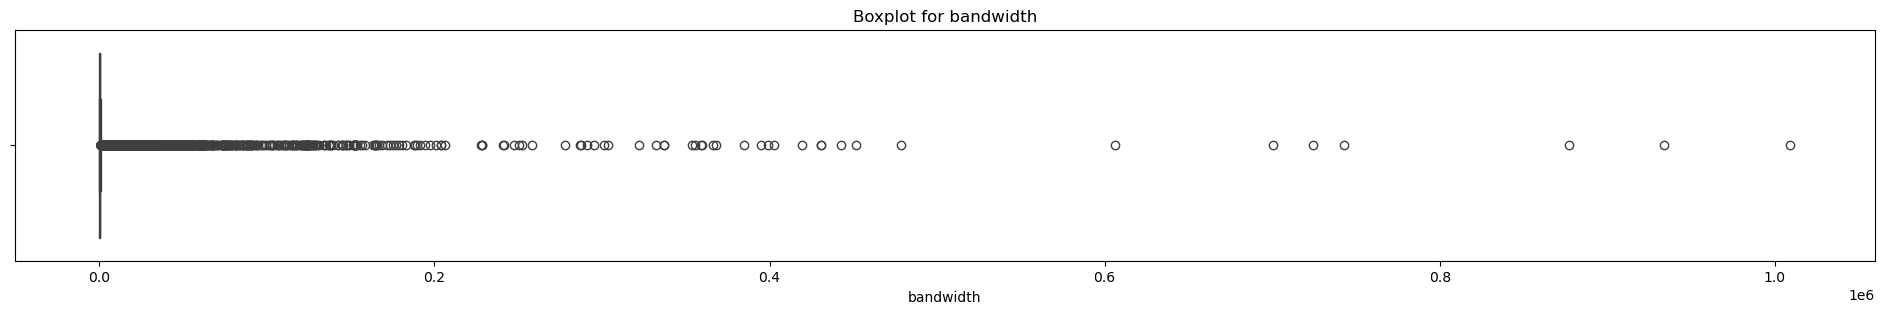

In [13]:
fig = plt.figure(1, figsize=(24, 3))
plt.title("Boxplot for bandwidth")
sns.boxplot(x=df_blue_waters_posix_filtered_no_outliers.bandwidth)

In [14]:
bandwidth_q1 = df_blue_waters_posix_filtered_no_outliers.bandwidth.quantile(0.25)
bandwidth_q3 = df_blue_waters_posix_filtered_no_outliers.bandwidth.quantile(0.75)
bandwidth_iqr = bandwidth_q3 - bandwidth_q1
bandwidth_iqr

np.float64(321.5014428607225)

In [15]:
filter = (df_blue_waters_posix_filtered_no_outliers.bandwidth >= bandwidth_q1 - 1.5 * bandwidth_iqr) & (df_blue_waters_posix_filtered_no_outliers.bandwidth <= bandwidth_q3 + 1.5 * bandwidth_iqr)

bandwidth_outliers = df_blue_waters_posix_filtered_no_outliers.loc[(filter)==False]
bandwidth_outliers

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,POSIX_F_FASTEST_RANK_TIME,POSIX_F_SLOWEST_RANK_TIME,start_time_sec,end_time_sec,nprocs,run_time,log_ver,exe,lustre,bandwidth
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0.0,0.571395,1540480731,1540488696,48,7966.0,3.1,./SpEC,1,2621.222063
7,194995,-2560,-2560,10229035,2168343,4553213,888833,0,1,-2560,...,0.0,1.117179,1540469929,1540513551,32,43623.0,3.1,./SpEC,1,3540.762870
8,37246,-4947,-4947,2671599,484540,1294249,152980,0,1,-4947,...,0.0,0.586285,1540459326,1540472869,48,13544.0,3.1,./SpEC,1,5177.978579
9,65132,-8684,-8684,8006548,2500757,5112917,248187,0,1,-8684,...,0.0,2.129242,1540445566,1540530411,37,84846.0,3.1,./SpEC,1,8608.528218
20,89451,-1439,-1439,4170464,1199036,2370078,415640,0,1,-1439,...,0.0,0.480623,1540452665,1540473977,32,21313.0,3.1,./SpEC,1,2070.447515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851169,142393,-1832,-1832,4610091,1239820,2551504,658408,0,1,-1832,...,0.0,0.638473,1506655874,1506665764,44,9891.0,3.1,./SpEC,1,2382.552808
851176,51322,-1049,-1049,1789952,415487,1008069,231768,0,1,-1049,...,0.0,0.369699,1506642231,1506647032,32,4802.0,3.1,./SpEC,1,3469.879306
851184,111557,-1299,-1299,4711750,1256832,2590768,526285,0,1,-1299,...,0.0,1.031707,1506669121,1506693155,32,24035.0,3.1,./SpEC,1,1487.180400
851185,213236,-2412,-2412,6919426,1966223,4199533,986267,0,1,-2412,...,0.0,0.417443,1506718488,1506734350,64,15863.0,3.1,./SpEC,1,2155.118626


In [16]:
df_blue_waters_posix_filtered_no_outliers = df_blue_waters_posix_filtered_no_outliers.loc[filter]

<Axes: xlabel='bandwidth'>

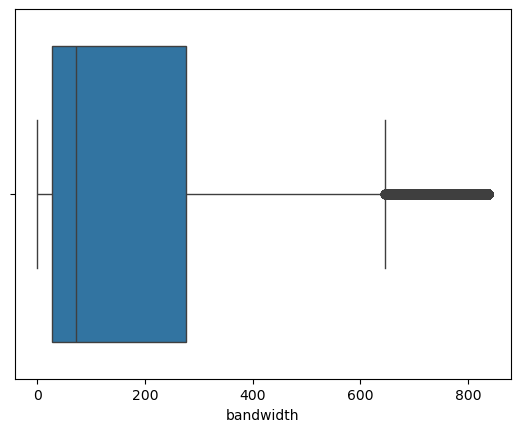

In [17]:
sns.boxplot(x=df_blue_waters_posix_filtered_no_outliers.bandwidth)

In [18]:
df_blue_waters_posix_filtered_no_outliers.to_csv(r"../data/blue_waters_posix_no_outliers.csv", index=False)